# Clasificador de Vino Tinto y Vino Blanco

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import arange
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

Para este proyecto voy a utilizar dos sets de datos, los cuales son de clasificación de calidad para vino tinto y blanco, pero al analizar los datos, no tenemos todas las clasificaciones de calidad (de 0 al 10), lo cual dificulta la utilización de múltiples modelos, por lo que voy a unir los dos data para formar un set de datos el cual me sirva para clasificar vino tinto y blanco.

*Datos obtenidos de : P. Cortez, A. Cerdeira, F. Almeida, T. Matos y J. Reis.
Modelar las preferencias del vino mediante la extracción de datos a partir de las propiedades fisicoquímicas. En Decision Support Systems, Elsevier, 47 (4): 547-553, 2009.*


In [4]:
#set de datos vino blanco
white = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
#set de datos vino tinto 
red = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [9]:
#crear columna tipo de vino blanco 
white['Type of wine'] = 'w'
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type of wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,w
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,w
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,w
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,w
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,w


In [10]:
#crear columna tio de vino tinto
red['Type of wine'] = 'r'
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type of wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,r
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,r
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,r
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,r
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,r


In [11]:
#concatenar set de datos
df = pd.concat([white, red], ignore_index=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type of wine
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,w
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,w
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,w
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,w
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,r
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,r
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,r
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,r


Nombre de las columnas: 

1. acidez fija
2. acidez volátil
3. ácido cítrico
4. azúcar residual
5. cloruros
6. dióxido de azufre libre
7. dióxido de azufre total
8. densidad
9. pH
10. sulfatos
11. alcohol
12. calidad (puntuación entre 0 y 10)

## Limpieza de datos

In [12]:
#Buscar datos faltantes:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type of wine            0
dtype: int64

No hay datos faltantes

In [13]:
#Buscar datos duplicados
df.duplicated().sum()

1177

Hay 1177 datos duplicados, lo cuales serán eliminados.

In [14]:
#Eliminar datos duplicados:
df = df.drop_duplicates()

In [15]:
#Ordenar índice para que queden de nuevo consecutivos.
df.reset_index(drop=True, inplace=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type of wine
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,w
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,w
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,w
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,w
4,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,r
5316,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,r
5317,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,r
5318,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,r


In [16]:
#Trabajar datos categoricos en columna 'Type of wine' 
type_le = LabelEncoder() 
type_wine_labels = type_le.fit_transform(df['Type of wine']) 
type_mappings = {index: label for index, label in enumerate(type_le.classes_)}
type_mappings

{0: 'r', 1: 'w'}

In [17]:
df['Type_wine_labels'] = type_wine_labels
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type of wine,Type_wine_labels
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,w,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,w,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,w,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,w,1
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,w,1


In [18]:
#Correlación entre las columnas
df.corr().sort_values(by = ['Type_wine_labels'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type_wine_labels
volatile acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.265205,-0.645335
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.202137,-0.499517
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.041884,-0.490364
fixed acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.080092,-0.486253
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.326434,-0.429377
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.039733,-0.310919
alcohol,-0.102573,-0.065411,-0.005496,-0.305242,-0.269601,-0.170012,-0.249004,-0.667811,0.097314,-0.017232,1.000000,0.469422,0.057756
quality,-0.080092,-0.265205,0.097954,-0.056830,-0.202137,0.054002,-0.050296,-0.326434,0.039733,0.041884,0.469422,1.000000,0.114809
citric acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.097954,0.183759
residual sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.056830,0.328695


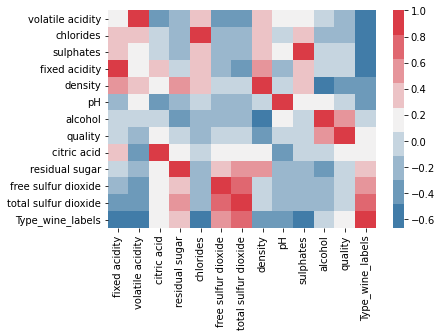

In [19]:
# Visualización de la correlación a través de un mapa de calor
sns.heatmap(df.corr().sort_values(by = ['Type_wine_labels']), cmap = sns.diverging_palette(240, 10, n=9))

## Visualizaciones

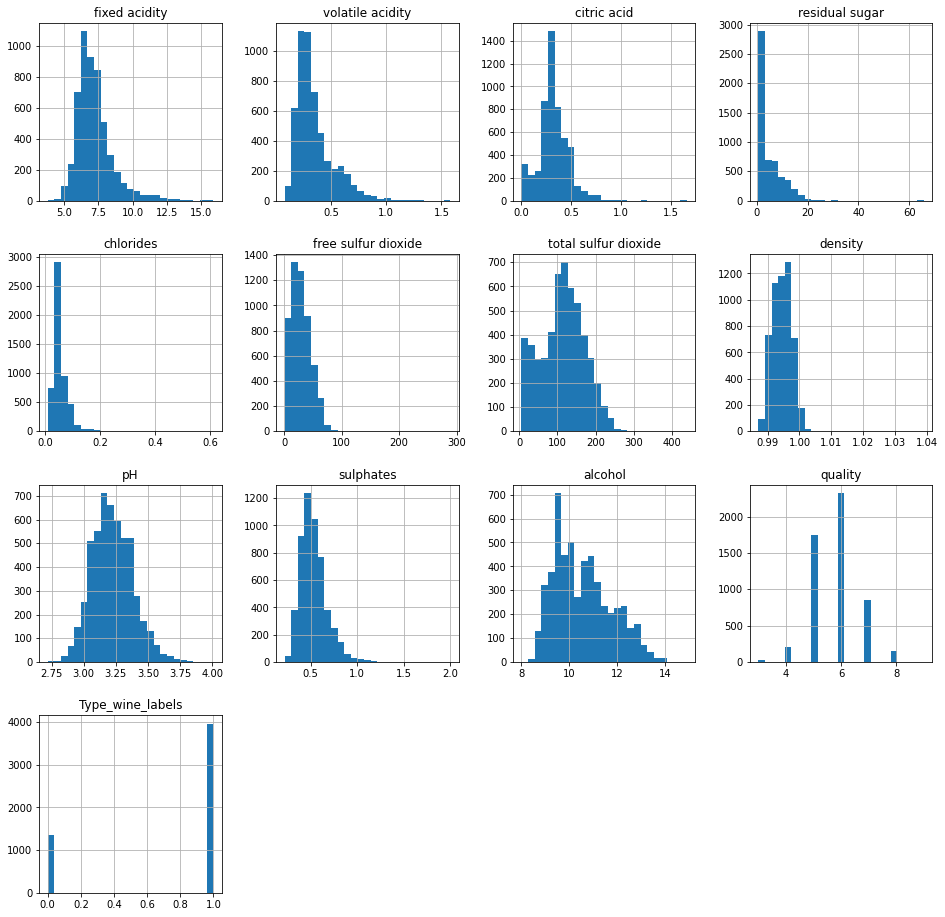

In [21]:
# graficar histogramas por columnas para ver comportamiento de los datos
df.loc[:,:].hist(bins=25,
                 figsize=(16,16));

In [22]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type_wine_labels
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.744549
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,1.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [24]:
#Filtros
type_white = df['Type of wine'] == 'w'
white_wine = df.loc[type_white,:]
red_wine = df.loc[~type_white,:]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

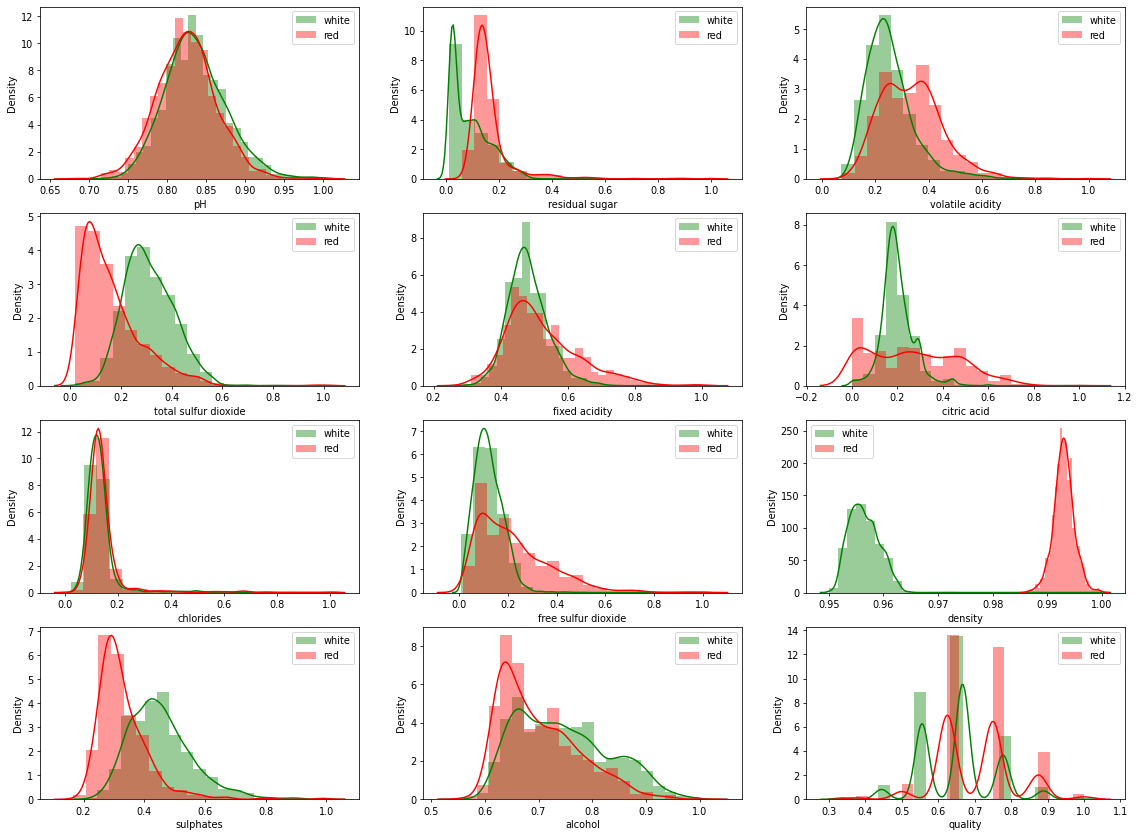

In [44]:
fig = plt.figure(figsize=(20,15), dpi=70)
#Grafico
plt.subplot(4, 3, 1);
sns.distplot(white_wine['pH']/white_wine['pH'].max(), label= 'white',bins = 30, color= 'green')
sns.distplot(red_wine['pH']/red_wine['pH'].max(), label= 'red',bins = 30, color = 'red')
plt.legend()

plt.subplot(4, 3, 2);
sns.distplot(white_wine['residual sugar']/white_wine['residual sugar'].max(), label= 'white',bins = 20, color= 'green')
sns.distplot(red_wine['residual sugar']/red_wine['residual sugar'].max(), label= 'red',bins = 20, color = 'red')
plt.legend()

plt.subplot(4, 3, 3);
sns.distplot(white_wine['volatile acidity']/white_wine['volatile acidity'].max(), label= 'white',bins = 20, color= 'green')
sns.distplot(red_wine['volatile acidity']/red_wine['volatile acidity'].max(), label= 'red',bins = 20, color = 'red')
plt.legend()

plt.subplot(4, 3, 4);
sns.distplot(white_wine['total sulfur dioxide']/white_wine['total sulfur dioxide'].max(), label= 'white',bins = 20, color= 'green')
sns.distplot(red_wine['total sulfur dioxide']/red_wine['total sulfur dioxide'].max(), label= 'red',bins = 20, color = 'red')
plt.legend()

plt.subplot(4, 3, 5);
sns.distplot(white_wine['fixed acidity']/white_wine['fixed acidity'].max(), label= 'white',bins = 30, color= 'green')
sns.distplot(red_wine['fixed acidity']/red_wine['fixed acidity'].max(), label= 'red',bins = 30, color = 'red')
plt.legend()

plt.subplot(4, 3, 6);
sns.distplot(white_wine['citric acid']/white_wine['citric acid'].max(), label= 'white',bins = 20, color= 'green')
sns.distplot(red_wine['citric acid']/red_wine['citric acid'].max(), label= 'red',bins = 20, color = 'red')
plt.legend()

plt.subplot(4, 3, 7);
sns.distplot(white_wine['chlorides']/white_wine['chlorides'].max(), label= 'white',bins = 20, color= 'green')
sns.distplot(red_wine['chlorides']/red_wine['chlorides'].max(), label= 'red',bins = 20, color = 'red')
plt.legend()

plt.subplot(4, 3, 8);
sns.distplot(white_wine['free sulfur dioxide']/white_wine['free sulfur dioxide'].max(), label= 'white',bins = 20, color= 'green')
sns.distplot(red_wine['free sulfur dioxide']/red_wine['free sulfur dioxide'].max(), label= 'red',bins = 20, color = 'red')
plt.legend()

plt.subplot(4, 3, 9);
sns.distplot(white_wine['density']/white_wine['density'].max(), label= 'white',bins = 30, color= 'green')
sns.distplot(red_wine['density']/red_wine['density'].max(), label= 'red',bins = 30, color = 'red')
plt.legend()

plt.subplot(4, 3, 10);
sns.distplot(white_wine['sulphates']/white_wine['sulphates'].max(), label= 'white',bins = 20, color= 'green')
sns.distplot(red_wine['sulphates']/red_wine['sulphates'].max(), label= 'red',bins = 20, color = 'red')
plt.legend()

plt.subplot(4, 3, 11);
sns.distplot(white_wine['alcohol']/white_wine['alcohol'].max(), label= 'white',bins = 20, color= 'green')
sns.distplot(red_wine['alcohol']/red_wine['alcohol'].max(), label= 'red',bins = 20, color = 'red')
plt.legend()

plt.subplot(4, 3, 12);
sns.distplot(white_wine['quality']/white_wine['quality'].max(), label= 'white',bins = 20, color= 'green')
sns.distplot(red_wine['quality']/red_wine['quality'].max(), label= 'red',bins = 20, color = 'red')
plt.legend()

Al observar estos gráficos de comparación de distribución de los datos de vino tinto v/s vino blanco, se puede ver que la mayoría de las columnas presentan diferencias, por lo que se puede utilizar este set de datos para clasificar vino tinto y vino blanco.